<a href="https://colab.research.google.com/github/APstats-labs/labs/blob/main/SA_C3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data pre-processing methods (1)

General requirements

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Sampling tehniques

### Preparing the data

Loading a STATA dataset from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_stata('/content/drive/MyDrive/Colab Notebooks/Statistics/Curs/Data_c2/ZA8761_v1-0-0.dta')

Listing variable names in a table

In [ ]:
variable_names = data.columns.tolist()

# Calculate the number of rows and columns for the tabular form
num_variables = len(variable_names)
num_columns = (num_variables + 19) // 20  # Round up to nearest multiple of 20

# Create a DataFrame to store the variable names in the desired format
names_df = pd.DataFrame(columns=[f'Column_{i+1}' for i in range(num_columns)])

# Fill in the DataFrame with variable names
for i, var_name in enumerate(variable_names):
    col_idx = i // 20
    names_df.loc[i % 20, f'Column_{col_idx+1}'] = var_name

# Display the DataFrame
names_df

,Column_1,Column_2,Column_3,Column_4,Column_5,Column_6,Column_7,Column_8,Column_9,Column_10,Column_11,Column_12,Column_13
0,studyno,d3_7,d3_28,q4_2,q5_11,q7_11,q13_1,q15_13,dx1,d12bg,d12nl,euronz20,w103
1,doi,d3_8,d3_29,q4_3,q6_1,q7_12,q13_2,q16_1,d4,d12cy,d12nl_r,eu_nms10,w100
2,version,d3_9,d3_30,q4_4,q6_2,q8_1,q13_3,q16_2,d4r1,d12cz,d12pl,eu_nms12,NaN
3,edition,d3_10,d3c,q4_5,q6_3,q8_2,q13_4,q16_3,d4r2,d12dk,d12pl_r,eu_nms13,NaN
4,survey,d3_11,d13,q4_6,q6_4,q8_3,q13_5,q16_4,d5a,d12ee,d12pt,eu25,NaN
5,uniqid,d3_12,q1,q4_7,q6_5,q9,q13_6,q16_5,d5b,d12de,d12ro,eu27,NaN
6,serialid,d3_13,q2,q4_8,q6_6,q10_1,consent,q16_6,d5c,d12gr,d12se,eu_la6,NaN
7,ipscntry,d3_14,q3_1,q4_9,q6_7,q10_2,q14,q16_7,d5d,d12gr_r,d12se_r,w1,NaN
8,country,d3_16,q3_2,q4_10,q6_8,q10_3,q15_1,q16_8,d5e,d12es,d12si,w5,NaN
9,isocntry,d3_17,q3_3,q4_11,q6_9,q10_4,q15_2,q16_9,d5r,d12es_r,d12si_r,w6,NaN


 Select only a subset of data and rename columns

In [ ]:
MentalProblems = data[['q1','q14', 'd5c']]
MentalProblems = MentalProblems.set_axis([ 'Feeling Last 4 weeks', 'Anxiety or Depression last 12 months', 'Ocupation'], axis=1)
MentalProblems = MentalProblems.iloc[2100:2110]
MentalProblems.insert(0, 'ID', MentalProblems.reset_index().index + 1)
MentalProblems

,ID,Feeling Last 4 weeks,Anxiety or Depression last 12 months,Ocupation
2100,1,I felt tired/worn out,Yes,Civil servant
2101,2,I felt calm and peaceful,No,Civil servant
2102,3,I felt calm and peaceful,No,NaN
2103,4,I felt tense,Yes,Office clerk
2104,5,I felt full of energy,No,Office clerk
2105,6,I felt tense,Yes,NaN
2106,7,I felt tense,Yes,Office clerk
2107,8,I felt calm and peaceful,Yes,NaN
2108,9,I felt calm and peaceful,No,Office clerk
2109,10,I felt calm and peaceful,Yes,Office clerk


### Sampling

**Sampling with replacement**

In [ ]:
WihtReplacement=MentalProblems.sample(n=5, replace=True, random_state=3)
WihtReplacement

,ID,Feeling Last 4 weeks,Anxiety or Depression last 12 months,Ocupation
2108,9,I felt calm and peaceful,No,Office clerk
2109,10,I felt calm and peaceful,Yes,Office clerk
2103,4,I felt tense,Yes,Office clerk
2108,9,I felt calm and peaceful,No,Office clerk
2108,9,I felt calm and peaceful,No,Office clerk


**Sampling without replacement**

In [ ]:
WithoutReplacement=MentalProblems.sample(n=5, replace=False, random_state=4)
WithoutReplacement

,ID,Feeling Last 4 weeks,Anxiety or Depression last 12 months,Ocupation
2103,4,I felt tense,Yes,Office clerk
2108,9,I felt calm and peaceful,No,Office clerk
2104,5,I felt full of energy,No,Office clerk
2109,10,I felt calm and peaceful,Yes,Office clerk
2102,3,I felt calm and peaceful,No,NaN


**Stratified sampling**

In [ ]:
# Replace NaN values in categorical columns with the string "NaN"
##Not doing this will lead to NaN not being counted
categorical_columns =MentalProblems.select_dtypes(include=['category']).columns
categorical_columns

for col in categorical_columns:
    MentalProblems[col] = MentalProblems[col].cat.add_categories(['NaN'])  # Add 'NaN' as a new category
    MentalProblems[col].fillna('NaN', inplace=True)


# Perform stratified sampling
Stratified = MentalProblems.groupby('Ocupation', group_keys=False).apply(lambda x: x.sample(frac=0.5))
Stratified

,ID,Feeling Last 4 weeks,Anxiety or Depression last 12 months,Ocupation
2100,1,I felt tired/worn out,Yes,Civil servant
2104,5,I felt full of energy,No,Office clerk
2108,9,I felt calm and peaceful,No,Office clerk
2105,6,I felt tense,Yes,NaN
2107,8,I felt calm and peaceful,Yes,NaN


## Missing data handling

### Preparing data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_homa = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Statistics/Curs/Data_c2/homa.xlsx')

<Axes: >

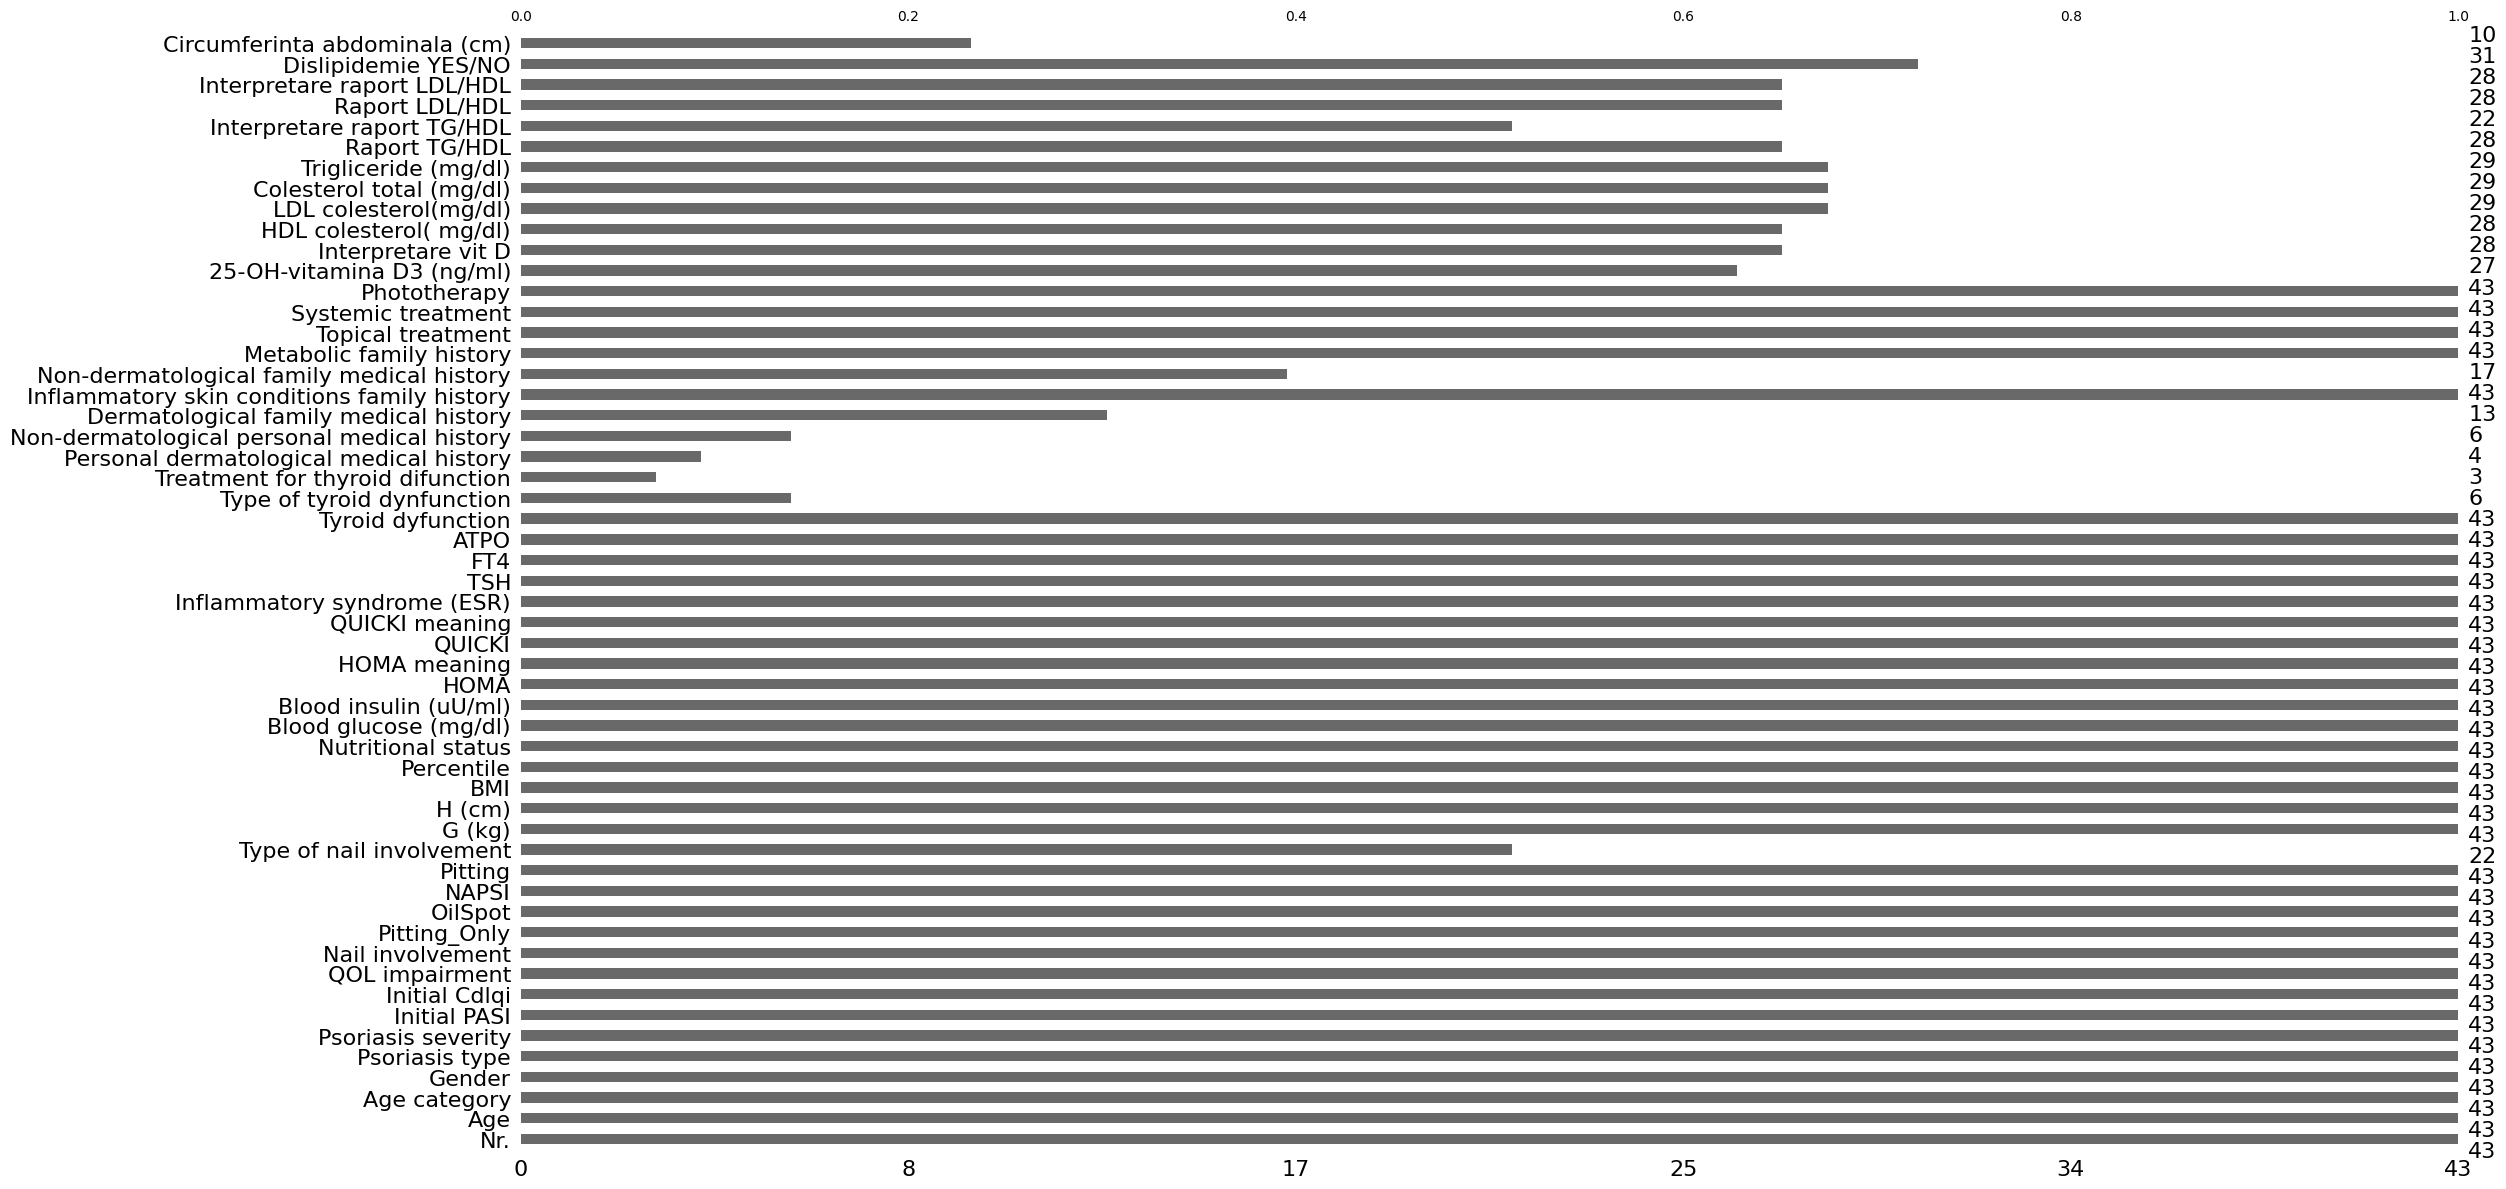

In [ ]:
import missingno as msno
msno.bar(data_homa)
#msno.heatmap(data_homa)

**!Always take a look at the data. See for example ATPO**

In [ ]:
#data_homa['ATPO']

### Missing data treatment procedures

#### Listwise treatment/Complete-cases

In [ ]:
data_homa_listwise = data_homa.dropna(subset=['Raport TG/HDL'],how='any')

<Axes: >

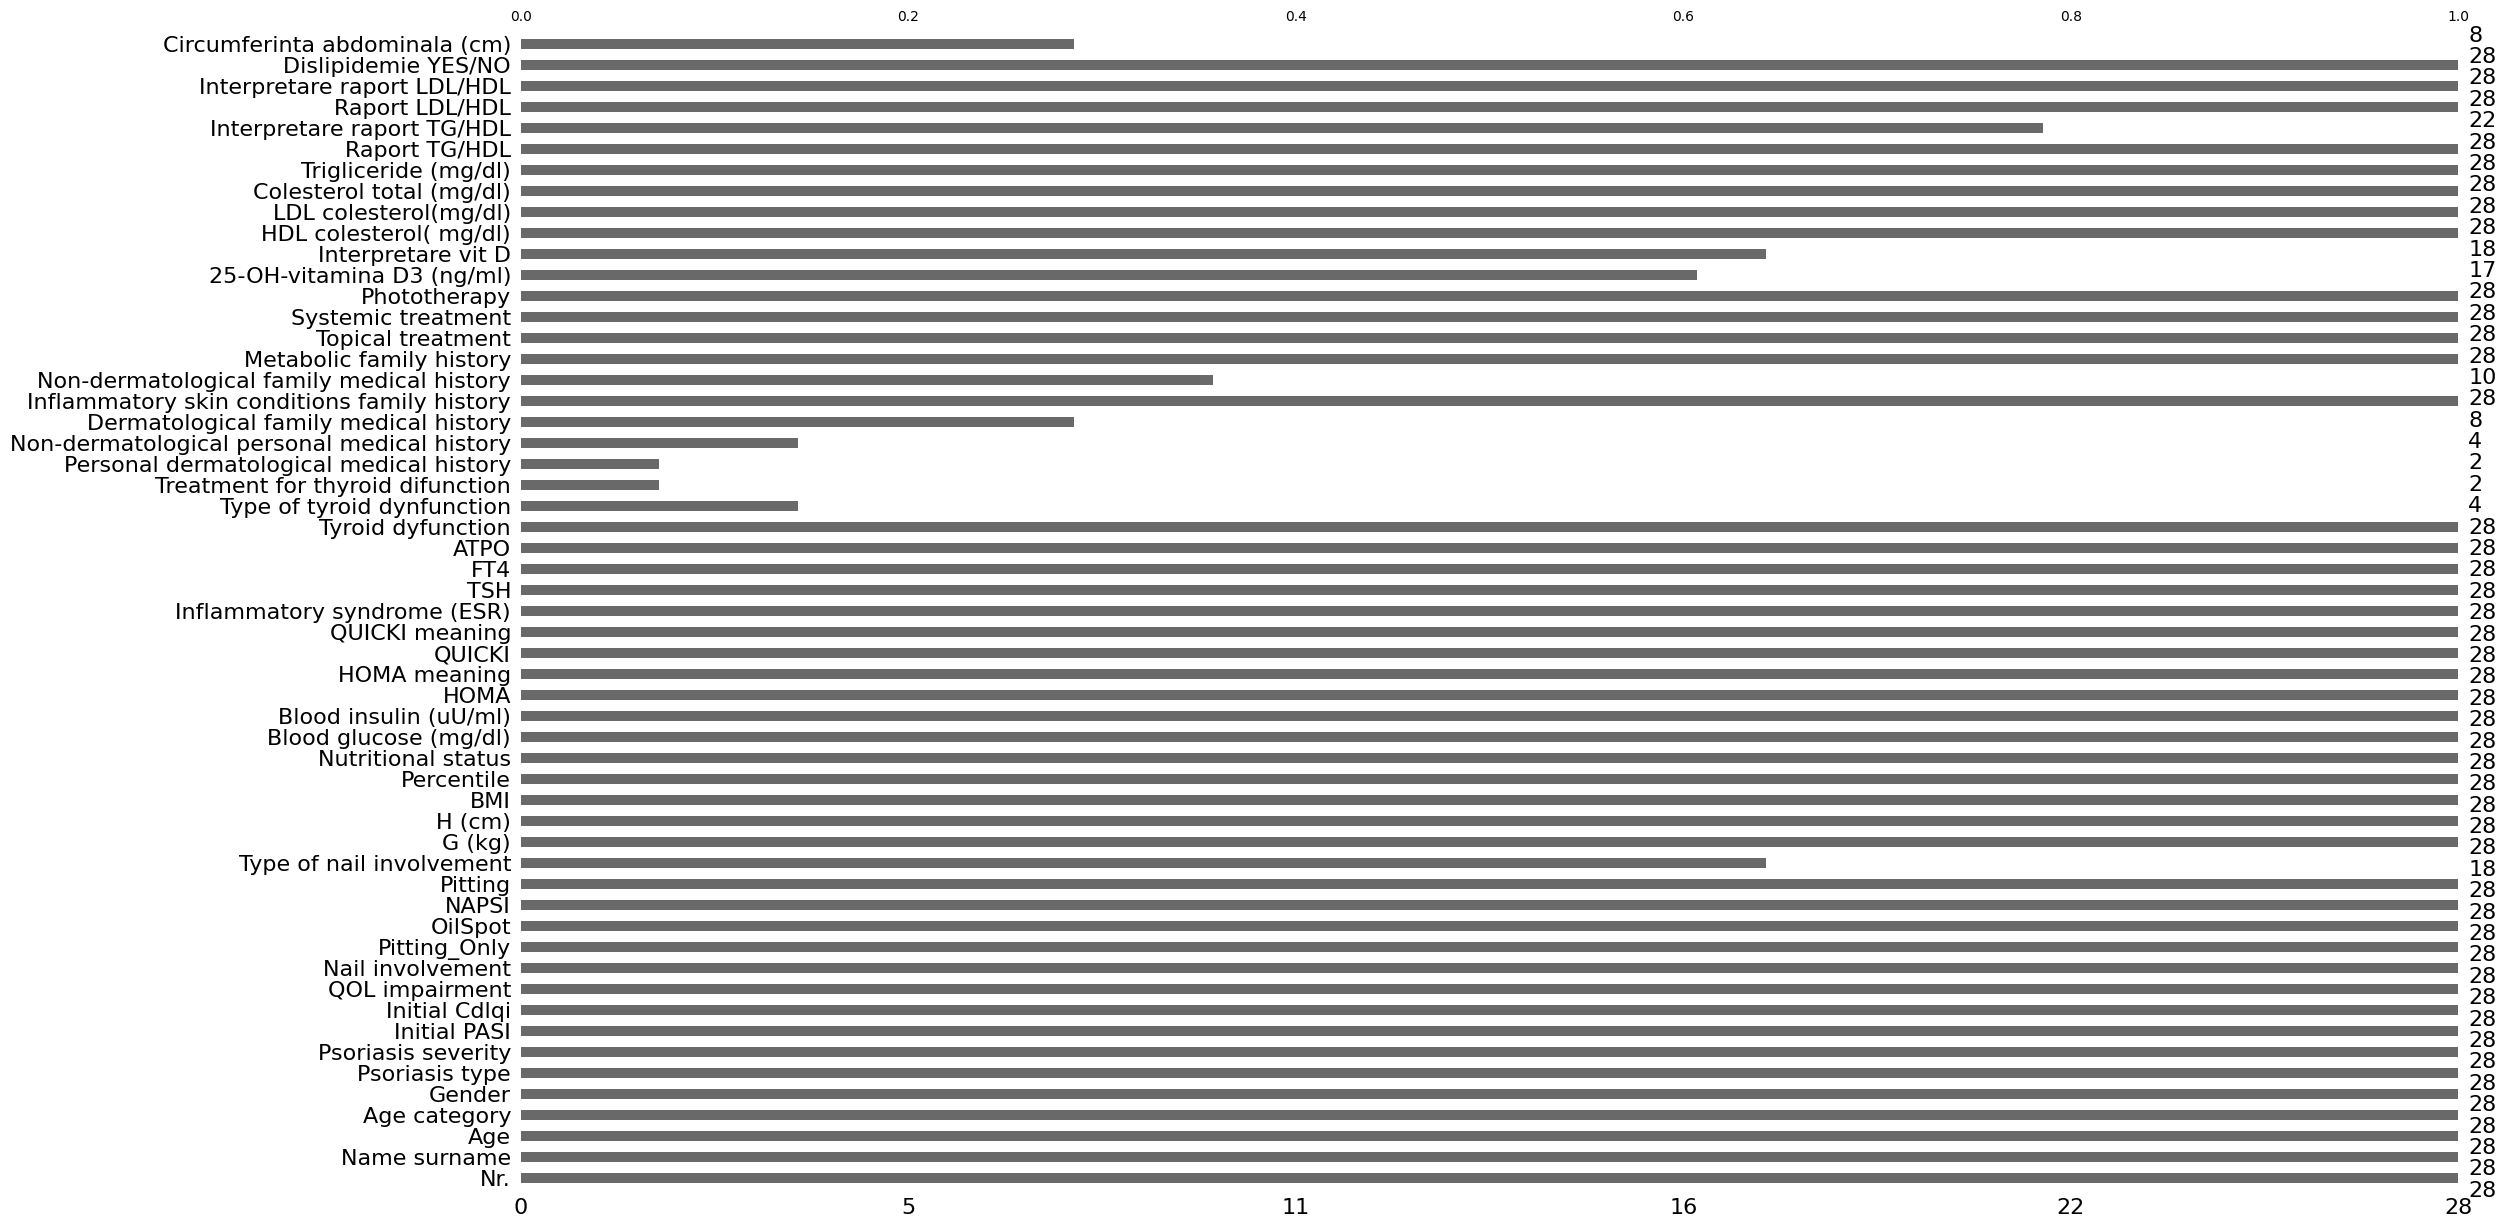

In [ ]:
msno.bar(data_homa_listwise)


In [ ]:
print(f"Initial dataset size: {len(data_homa)}, Dataset size with listwise: {len(data_homa_listwise)}")

Initial dataset size: 43, Dataset size with listwise: 28


####Pairwise**/**Avalabile cases

Pandas uses pairwise deletion by default.


Look at the differences below and notice how mean changes when compared to listwise

In [ ]:
print(f"Mean of variable with missing (pairwise): {data_homa['Raport LDL/HDL'].mean()}, Mean of variable with missing (listwise): {data_homa_listwise['Raport LDL/HDL'].mean()}")

Mean of variable with missing (pairwise): 1.9307142857142858, Mean of variable with missing (listwise): 1.9307142857142858


In [ ]:
print(f"Mean of another variable with no missing (pairwise): {data_homa['Age'].mean()}, Mean of another variable with no missing (listwise): {data_homa_listwise['Age'].mean()}")

Mean of another variable with no missing (pairwise): 12.023255813953488, Mean of another variable with no missing (listwise): 11.928571428571429


#### Indicator

In [ ]:
from sklearn.impute import SimpleImputer
mode_imputer = SimpleImputer(strategy='most_frequent',add_indicator=True)

In [ ]:
data_homa_mode_indicator = pd.DataFrame(mode_imputer.fit_transform(data_homa),
                                        columns = mode_imputer.get_feature_names_out())

Notice how an indicator was created for each column with NAN

In [ ]:
data_homa.shape

(43, 54)

In [ ]:
data_homa_mode_indicator.shape

(43, 74)

In [ ]:
pd.set_option('display.max_columns', None)
data_homa

In [ ]:
pd.set_option('display.max_columns', None)
data_homa_mode_indicator

,Nr.,Name surname,Age,Age category,Gender,Psoriasis type,Psoriasis severity,Initial PASI,Initial Cdlqi,QOL impairment,Nail involvement,Pitting_Only,OilSpot,NAPSI,Pitting,Type of nail involvement,G (kg),H (cm),BMI,Percentile,Nutritional status,Blood glucose (mg/dl),Blood insulin (uU/ml),HOMA,HOMA meaning,QUICKI,QUICKI meaning,Inflammatory syndrome (ESR),TSH,FT4,ATPO,Tyroid dyfunction,Type of tyroid dynfunction,Treatment for thyroid difunction,Personal dermatological medical history,Non-dermatological personal medical history,Dermatological family medical history,Inflammatory skin conditions family history,Non-dermatological family medical history,Metabolic family history,Topical treatment,Systemic treatment,Phototherapy,25-OH-vitamina D3 (ng/ml),Interpretare vit D,HDL colesterol( mg/dl),LDL colesterol(mg/dl),Colesterol total (mg/dl),Trigliceride (mg/dl),Raport TG/HDL,Interpretare raport TG/HDL,Raport LDL/HDL,Interpretare raport LDL/HDL,Dislipidemie YES/NO,Circumferinta abdominala (cm),missingindicator_Type of nail involvement,missingindicator_Type of tyroid dynfunction,missingindicator_Treatment for thyroid difunction,missingindicator_Personal dermatological medical history,missingindicator_Non-dermatological personal medical history,missingindicator_Dermatological family medical history,missingindicator_Non-dermatological family medical history,missingindicator_25-OH-vitamina D3 (ng/ml),missingindicator_Interpretare vit D,missingindicator_HDL colesterol( mg/dl),missingindicator_LDL colesterol(mg/dl),missingindicator_Colesterol total (mg/dl),missingindicator_Trigliceride (mg/dl),missingindicator_Raport TG/HDL,missingindicator_Interpretare raport TG/HDL,missingindicator_Raport LDL/HDL,missingindicator_Interpretare raport LDL/HDL,missingindicator_Dislipidemie YES/NO,missingindicator_Circumferinta abdominala (cm)
0,1,ARGHIR VLAD ANDREI,14,Adolescence,M,Inverse,Mild,0.6,1,No effect,YES,1,0,8,1,Pitting,65.5,170,22.1,84,Normal weight,79.7,15.68,3.1,Elevated,0.3229,Low,NO,N,N,N,NO,Euthyroid autoimmune thyroiditis,Euthyrox,Achantosis nigricans,Atshma,Father - psoriasis,NO,Twin brother asthma,NO,YES,NO,NO,26.0,Insuficient,43.6,47.4,125.8,23.9,2.4,Optim,1.9,N,YES,90.0,False,True,True,True,False,True,False,False,False,True,True,True,True,True,True,True,True,True,True
1,2,BEJAN FALA RARES STEFAN,17,Adolescence,M,Vulgaris,Moderate,6.0,4,Small effect,NO,0,0,0,0,Pitting,65.0,180,20.1,31,Normal weight,101.2,7.17,1.8,Normal,0.34956,Normal,NO,N,N,N,NO,Euthyroid autoimmune thyroiditis,Euthyrox,Achantosis nigricans,Allergic rhinitis,"Mother, two brothers - psoriasis",YES,Father - type 2 diabetes mellitus,YES,YES,NO,NO,24.6,Deficit,43.6,47.4,125.8,23.9,2.4,Optim,1.9,N,YES,90.0,True,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True
2,3,BUCUR BEATRICE ALEXANDRA,12,Adolescence,F,Vulgaris,Mild,2.1,3,Small effect,NO,0,0,0,0,Pitting,73.0,152,31.9,99,Obese,94.9,14.04,3.3,Elevated,0.32004,Low,YES,N,N,N,NO,Euthyroid autoimmune thyroiditis,Euthyrox,Keratosis pilaris,Allergic rhinitis,"Brother, mother - psoriasis",YES,Maternal grandmother - thyroid disfunction,NO,YES,NO,NO,13.4,Deficit,43.6,47.4,125.8,23.9,2.4,Optim,1.9,N,YES,90.0,True,True,True,False,True,False,True,False,False,True,True,True,True,True,True,True,True,True,True
3,4,BULDUM OVIDIU,6,Middle childhood,M,Vulgaris,Mild,3.8,4,Small effect,YES,1,0,18,1,Pitting,29.5,143,14.4,20,Normal weight,87.9,4.03,0.9,Normal,0.3923,Normal,NO,N,N,N,NO,Euthyroid autoimmune thyroiditis,Euthyrox,Achantosis nigricans,Allergic rhinitis,Paternal grandmother - psoriasis,YES,Maternal grandmother - thyroid disfunction,NO,YES,NO,NO,28.9,Insuficient,63.8,70.7,125.8,23.9,0.37,Optim,1.1,N,NO,90.0,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,5,CIOCOIU ANA MARIA CRISTIANA,10,Middle childhood,F,Inverse,Mild,1.8,5,Small effect,YES,0,1,25,1,"Pitting, oil spot",73.0,156,30.0,99,Obese,76.1,20.69,3.9,Elevated,0.3128,Low,YES,N,N,N

####Mean imputation (numeric only)

In [ ]:
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(strategy='mean') ###median can also be used

In [ ]:
data_homa_mean = data_homa.copy()

for col in data_homa_mean.select_dtypes(include=['number']).columns:
    data_homa_mean[col] = mean_imputer.fit_transform(data_homa[[col]]) ##this is required as mean only works for numeric

<Axes: >

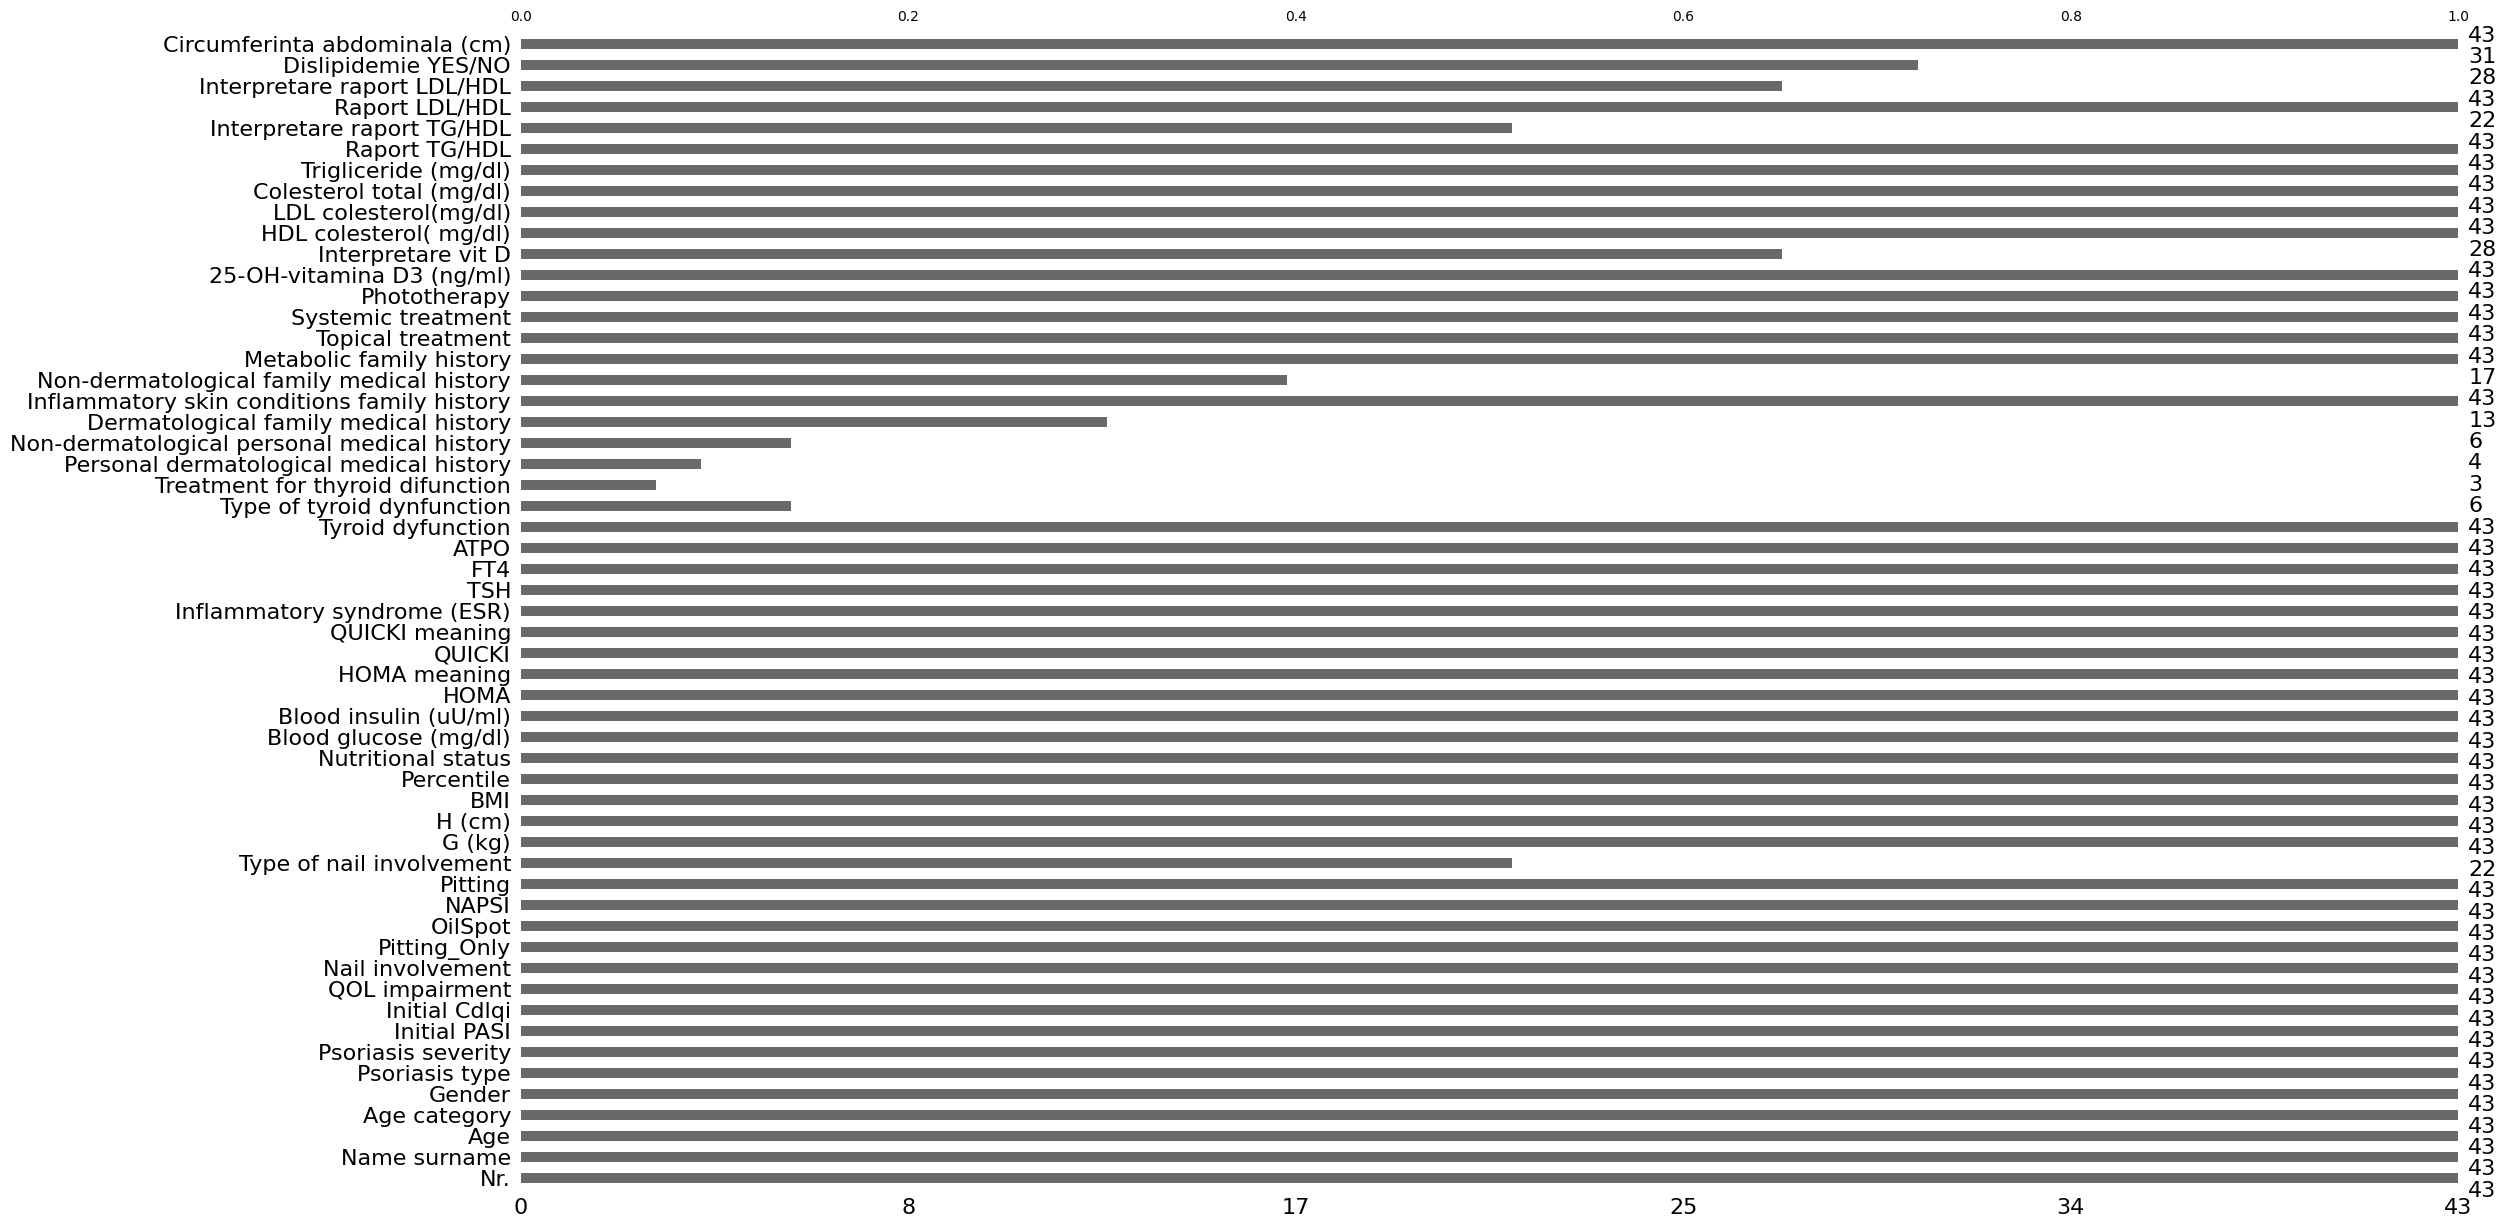

In [ ]:
msno.bar(data_homa_mean) #only numeric data was changes

The mean remained unchanged

In [ ]:
print(f"Mean of variable with missing (pairwise): {data_homa['Raport LDL/HDL'].mean()}, Mean variable with missing (Mean Imputation): {data_homa_mean['Raport LDL/HDL'].mean()}")

Mean of variable with missing (pairwise): 1.9307142857142858, Mean variable with missing (Mean Imputation): 1.9307142857142858


The variance changed

In [ ]:
print(f"Variance of variable with missing (pairwise): {data_homa['Raport LDL/HDL'].var()}, Variance variable with missing (Mean Imputation): {data_homa_mean['Raport LDL/HDL'].var()}")

Variance of variable with missing (pairwise): 0.38085132275132266, Variance variable with missing (Mean Imputation): 0.24483299319727886


####Mode imputation (numeric and categorical)

In [ ]:
from sklearn.impute import SimpleImputer
mode_imputer = SimpleImputer(strategy='most_frequent')

In [ ]:
data_homa_mode = mode_imputer.fit_transform(data_homa)
data_homa_mode_df = pd.DataFrame(data_homa_mode, columns=data_homa.columns) ###this is necessary as SimpleImputer outputs numpy array; additionaly, simply converting from numpy to pd loses column names

<Axes: >

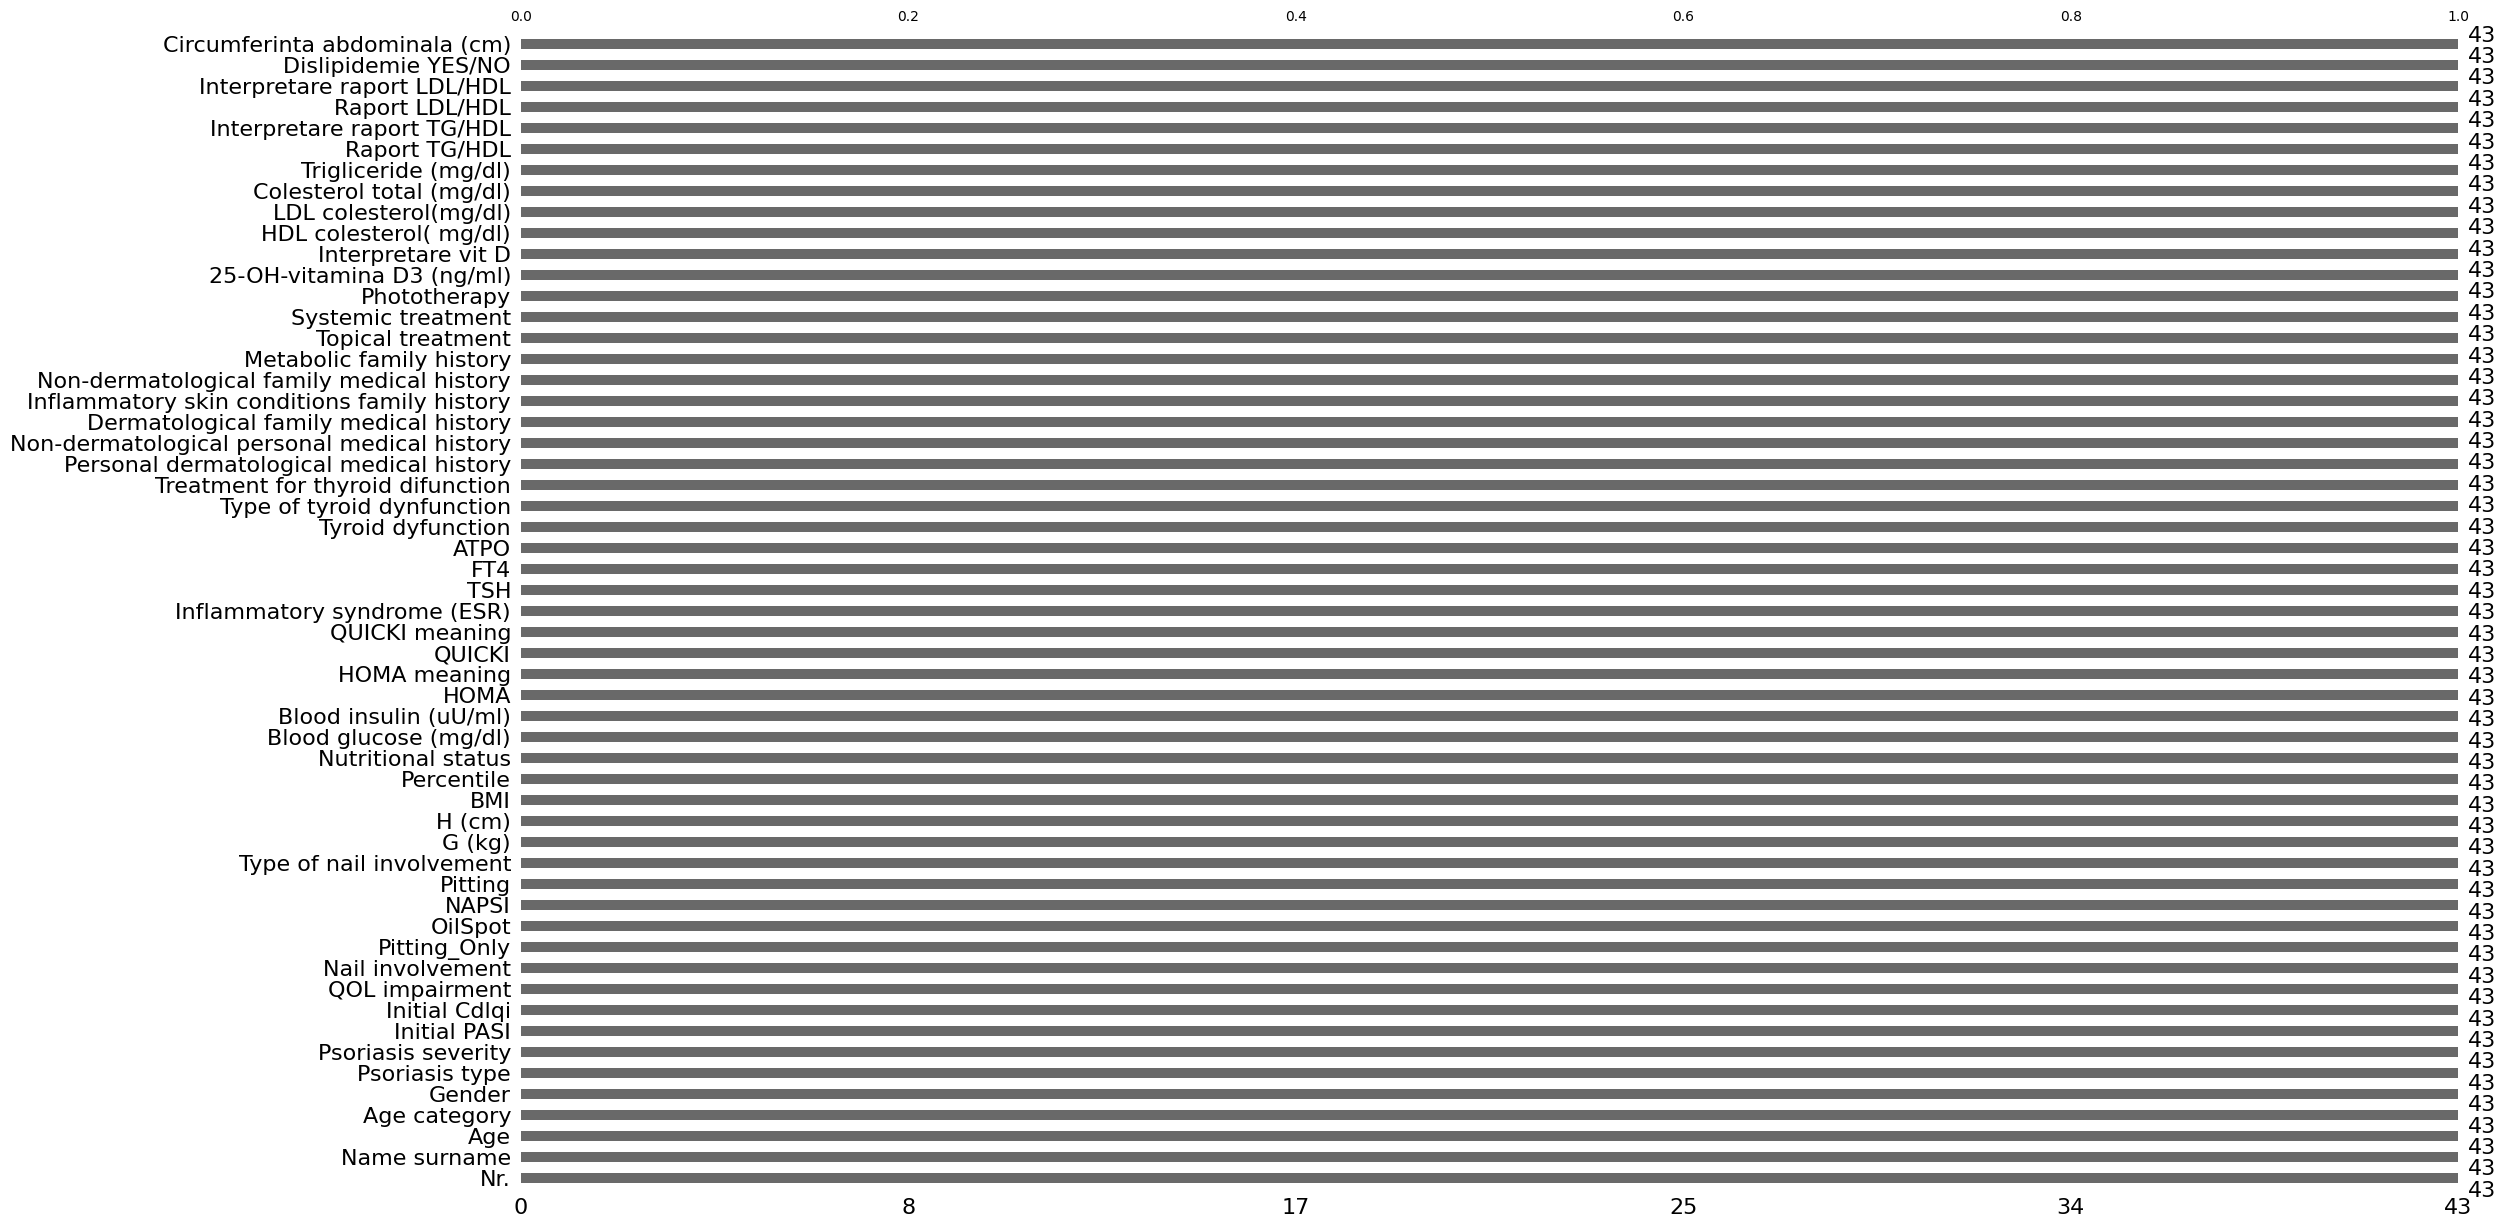

In [ ]:
msno.bar(data_homa_mode_df)

Changes the mean

In [ ]:
print(f"Mean of variable with missing (pairwise): {data_homa['Raport LDL/HDL'].mean()}, Mean variable with missing (Mode Imputation): {data_homa_mode_df['Raport LDL/HDL'].mean()}")

Mean of variable with missing (pairwise): 1.9307142857142858, Mean variable with missing (Mode Imputation): 1.9199999999999995


Changes the variance

In [ ]:
print(f"Variance of variable with missing (pairwise): {data_homa['Raport LDL/HDL'].var()}, Variance variable with missing (Mean Imputation): {data_homa_mode_df['Raport LDL/HDL'].var()}")

Variance of variable with missing (pairwise): 0.38085132275132266, Variance variable with missing (Mean Imputation): 0.24505238095238097


####Regression imputation (numeric data only)

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
regression_imputer = IterativeImputer() ##Uses bayesian Ridge

In [ ]:
categorical_columns = []
numeric_columns = []
for c in data_homa.columns:
    if data_homa[c].map(type).eq(str).any(): #check if there are any strings in column
        categorical_columns.append(c)
    else:
        numeric_columns.append(c)

#create two DataFrames, one for each data type
data_homa_numeric = data_homa[numeric_columns]
data_homa_categorical = pd.DataFrame(data_homa[categorical_columns])

In [ ]:
data_homa_regress = pd.DataFrame(regression_imputer.fit_transform(data_homa_numeric),
                                        columns = regression_imputer.get_feature_names_out())

In [ ]:
data_homa_regress_final = pd.concat([data_homa_regress, data_homa_categorical], axis = 1)

<Axes: >

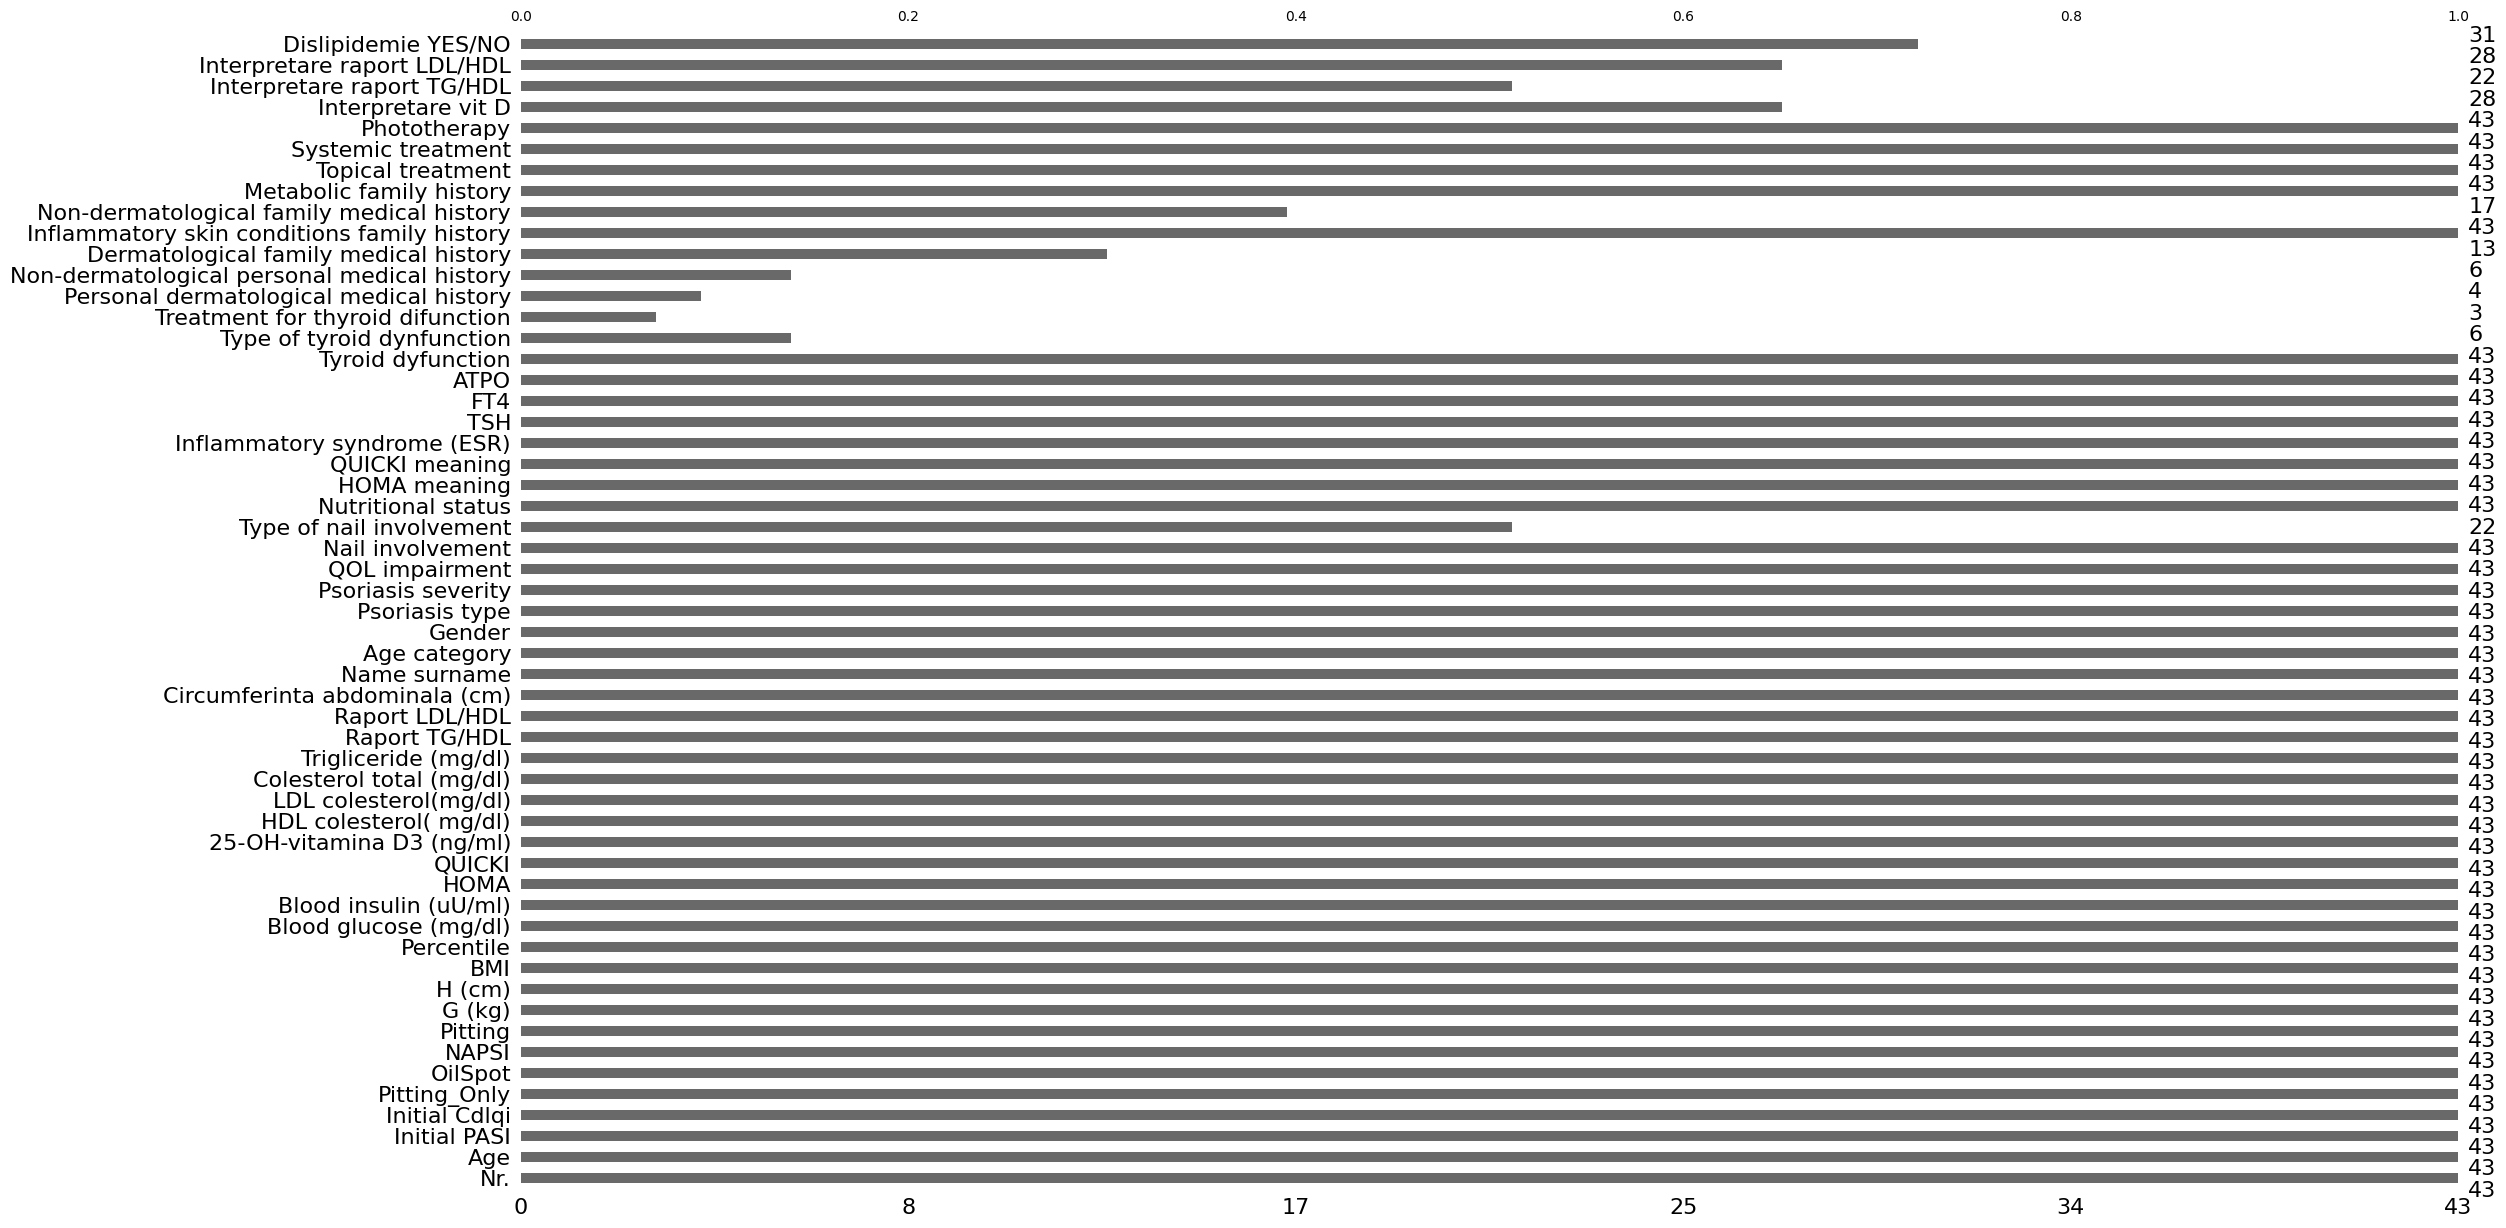

In [ ]:
msno.bar(data_homa_regress_final) #only numeric were completed

Notice that this also decreases variance, however at a lower magnitude than mean imputation

In [ ]:
data_homa['Raport LDL/HDL'].var()

0.38085132275132266

In [ ]:
data_homa_mean['Raport LDL/HDL'].var()

0.24483299319727886

In [ ]:
data_homa_regress_final['Raport LDL/HDL'].var()

0.25715735531954115

Notice this is also reflected in the correlation




In [ ]:
np.corrcoef(data_homa_mean['Raport LDL/HDL'], data_homa_mean['BMI'])

array([[1.       , 0.2956838],
       [0.2956838, 1.       ]])

In [ ]:
np.corrcoef(data_homa_regress_final['Raport LDL/HDL'], data_homa_regress_final['BMI'])

array([[1.       , 0.3072423],
       [0.3072423, 1.       ]])

More importantly, all the correlations between the target variable and the indpendent variables used in the regression are strenghtened

#### Logistic Regression imputation (categorical and numeric data )

First, look at the data and see if any cleaning has to be done.


Also to check if you are facing unknowns unknowns.

In [ ]:
for col in data_homa:
    unique_values = data_homa[col].unique()
    print(f"Column '{col}':")
    for value in unique_values:
        print(f"  - {value}")
    print()  # Add a blank line for better readability

Assuming that the missing data for "Type of tyroid dynfunction" falls into the category of "known unknowns" (Although this is not the case!)

Data has to be encoded

!if you read this, check difference between OneHotEncoded and OrdinalEncoder. Notice that in Neural Networks you often have to use OneHotEncoding even on indicator data, whereas in this course we don't do that. Also check Label encoder, which will open the way for the terms "embeddings" used in AI/DL

!if you read this check about cyclical features encoding: https://www.kaggle.com/code/avanwyk/encoding-cyclical-features-for-deep-learning

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [ ]:
# Select the column to encode
column_to_encode = 'Type of tyroid dynfunction'

not_null_mask = data_homa[column_to_encode].notnull()
data_homa.loc[not_null_mask, 'Encoded_' + column_to_encode] = label_encoder.fit_transform(data_homa.loc[not_null_mask, column_to_encode])
data_homa['Encoded_' + column_to_encode] = data_homa['Encoded_' + column_to_encode].astype('Int64')  # Preserve NaNs as Int64 type


print(data_homa[["Encoded_Type of tyroid dynfunction","Type of tyroid dynfunction"]].head(10))


   Encoded_Type of tyroid dynfunction        Type of tyroid dynfunction
0                                <NA>                               NaN
1                                <NA>                               NaN
2                                <NA>                               NaN
3                                <NA>                               NaN
4                                <NA>                               NaN
5                                <NA>                               NaN
6                                <NA>                               NaN
7                                   1  Euthyroid autoimmune thyroiditis
8                                <NA>                               NaN
9                                <NA>                               NaN


Impute the data using "autoimpute". Sklearn does not support Logistic Regression

In [ ]:
!pip install autoimpute

In [ ]:
from autoimpute.imputations import SingleImputer
predictor_cols = ["BMI", "NAPSI", "Age", "Initial Cdlqi"]
Logistic_Regression_imputer = SingleImputer(strategy={"Encoded_Type of tyroid dynfunction": "multinomial logistic"}, predictors={"Encoded_Type of tyroid dynfunction": predictor_cols})

Notice the failure to converge: optimization stuff probably

In [ ]:
data_homa_LR = Logistic_Regression_imputer.fit_transform(data_homa)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [ ]:
data_homa_LR['Decoded_Type of tyroid dynfunction'] = label_encoder.inverse_transform(data_homa_LR["Encoded_Type of tyroid dynfunction"].dropna().astype(int)) #this is to bring back the labels

In [ ]:
print(data_homa_LR[["Encoded_Type of tyroid dynfunction","Decoded_Type of tyroid dynfunction"]].head(10))

   Encoded_Type of tyroid dynfunction Decoded_Type of tyroid dynfunction
0                                   2                    Hypothrroidism 
1                                   3  Primary autoimmune hypothyroidism
2                                   2                    Hypothrroidism 
3                                   1   Euthyroid autoimmune thyroiditis
4                                   1   Euthyroid autoimmune thyroiditis
5                                   2                    Hypothrroidism 
6                                   2                    Hypothrroidism 
7                                   1   Euthyroid autoimmune thyroiditis
8                                   3  Primary autoimmune hypothyroidism
9                                   1   Euthyroid autoimmune thyroiditis


####Stohastic Regression imputation (numeric data only)

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
regression_imputer_stohastic = IterativeImputer(sample_posterior=True, min_value = 0.5,max_value = 3.9, random_state=14) ##Uses bayesian Ridge, samping from the posterior gives us the noise. A min and max were used to avoid implausable results

<Axes: >

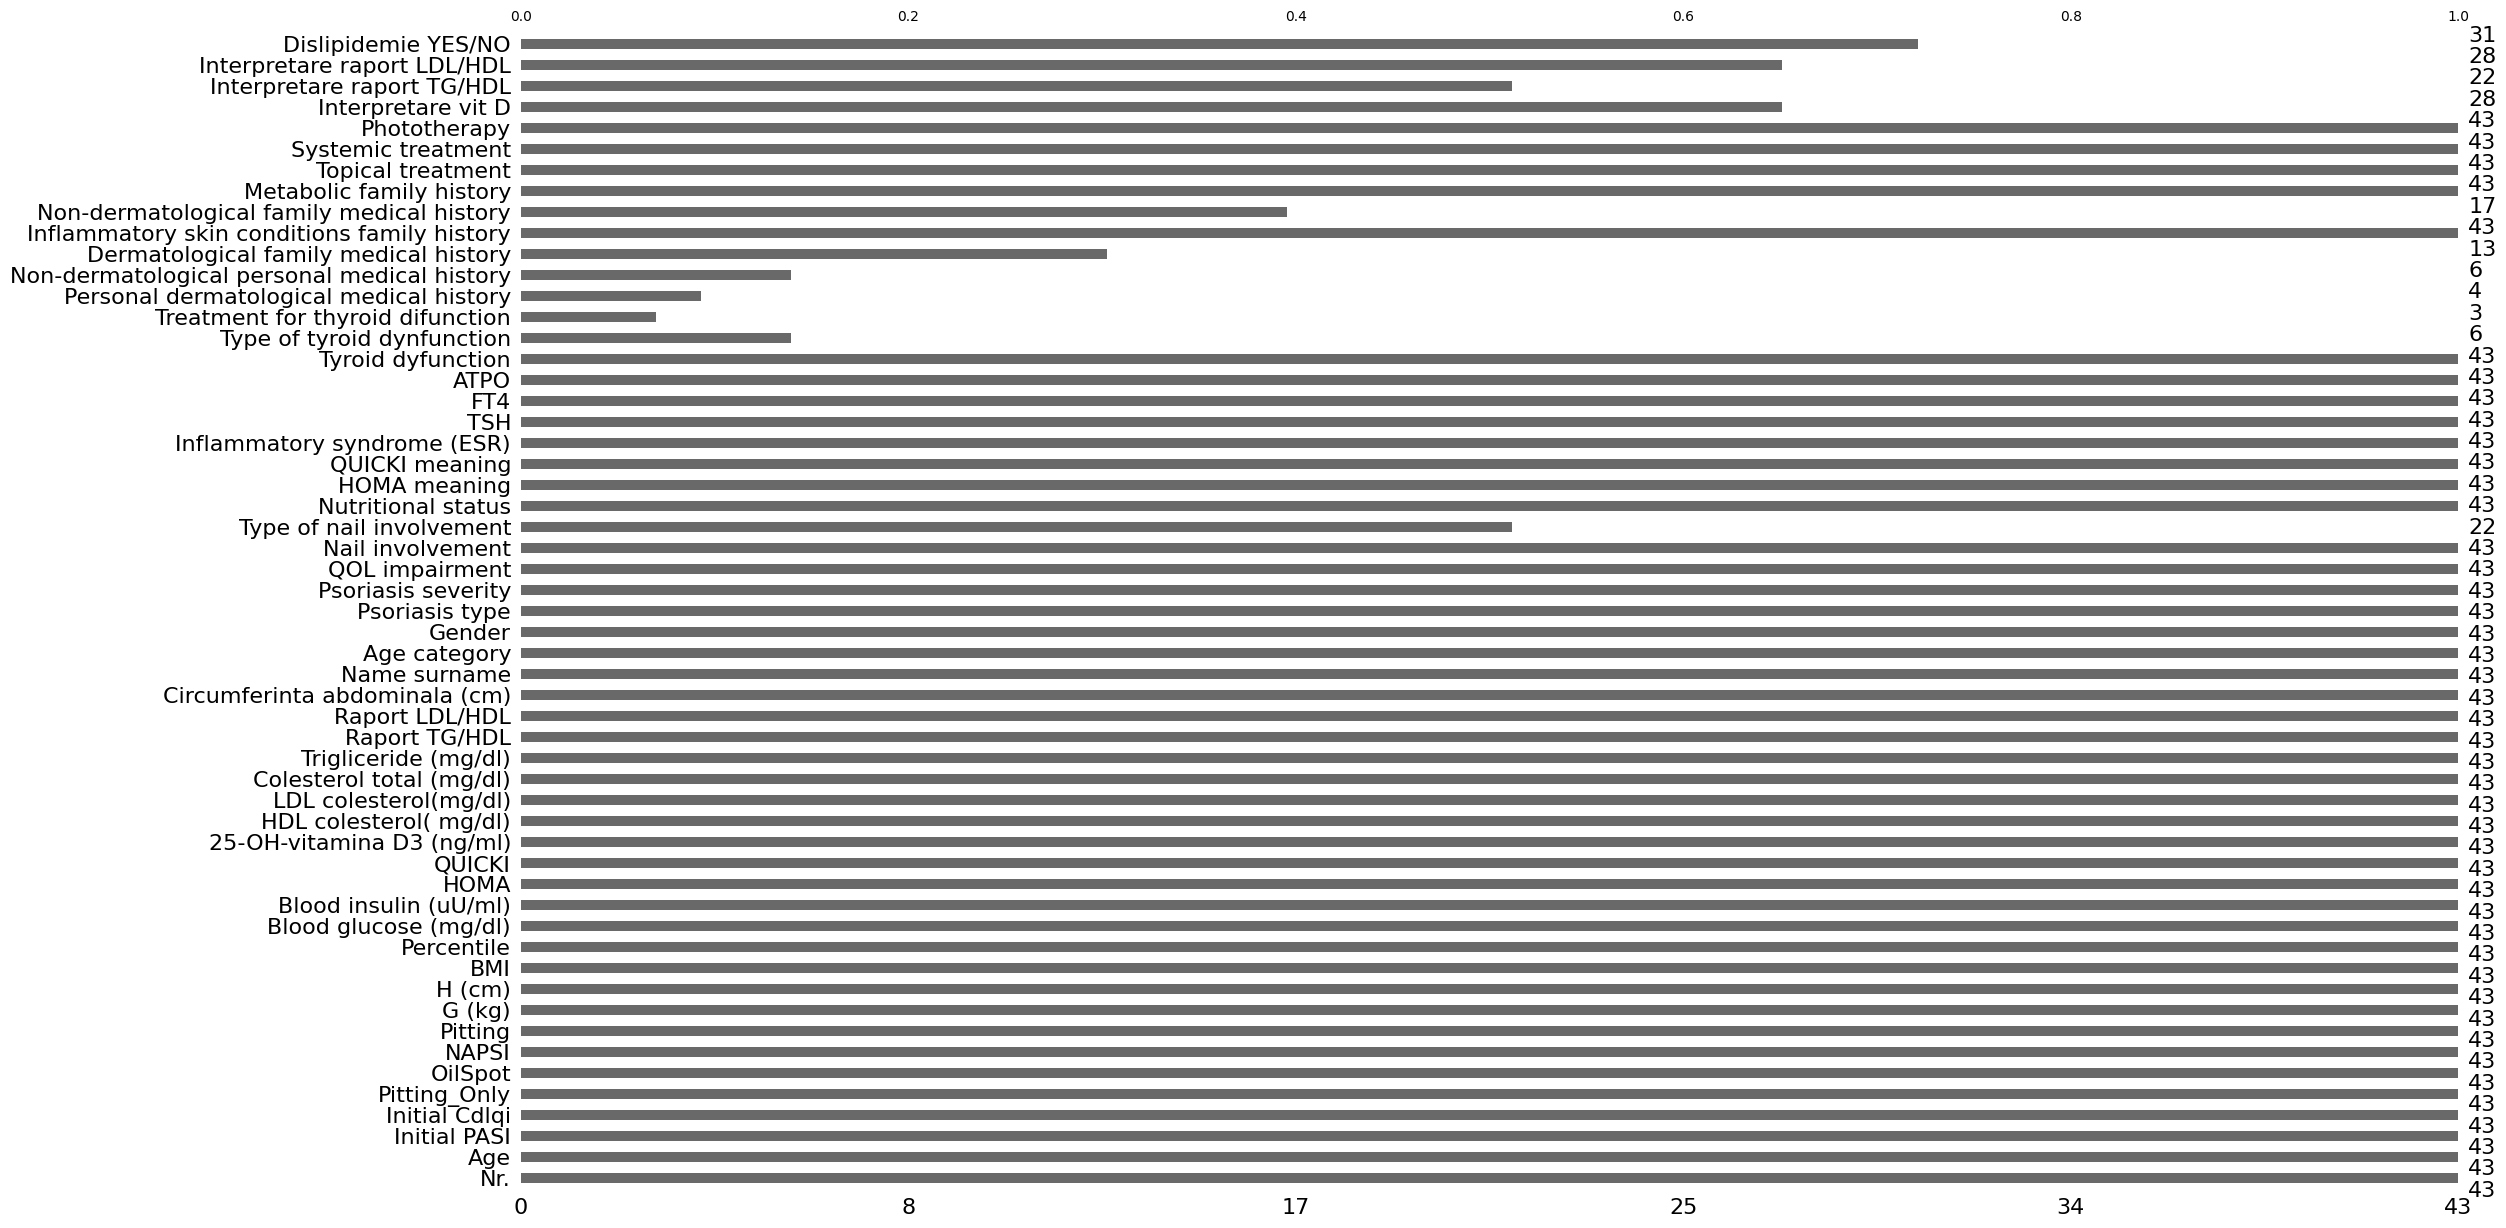

In [ ]:
categorical_columns = []
numeric_columns = []
for c in data_homa.columns:
    if data_homa[c].map(type).eq(str).any(): #check if there are any strings in column
        categorical_columns.append(c)
    else:
        numeric_columns.append(c)

#create two DataFrames, one for each data type
data_homa_numeric = data_homa[numeric_columns]
data_homa_categorical = pd.DataFrame(data_homa[categorical_columns])

data_homa_regress_stohastic = pd.DataFrame(regression_imputer_stohastic.fit_transform(data_homa_numeric),
                                        columns = regression_imputer_stohastic.get_feature_names_out())

data_homa_regress_final_stohastic = pd.concat([data_homa_regress_stohastic, data_homa_categorical], axis = 1)

msno.bar(data_homa_regress_final_stohastic)

Notice that the variance is the closest to the original one (0.38) and biased upwards.

In [ ]:
data_homa_regress_final_stohastic['Raport LDL/HDL'].var()

0.5192480843501386

Notice correlations are the smallests when compared with regression imputation (the difference is small in this case)

In [ ]:
np.corrcoef(data_homa_regress_final_stohastic['Raport LDL/HDL'], data_homa_regress_final_stohastic['BMI'])

array([[1.        , 0.29556988],
       [0.29556988, 1.        ]])

Note: Consider that here we did not use the residuals to introduce noise, but rather sampled from the posterior.